<a href="https://colab.research.google.com/github/irfan030303/DIFG2130_kelas-A_25_2311533009_Irfan-Trianda/blob/main/Praktikum4/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kode dibawah digunakan untuk memuat dataset Iris, memisahkan fitur dan target, lalu menentukan jumlah sampel dan fitur dalam dataset. Terakhir, kode ini juga menampilkan jumlah sampel (observasi) dan jumlah fitur (variabel) melalui fungsi print.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris['data']
y = iris['target']

n_samples, n_features = x.shape

print('Number of sample',n_samples)
print('Number of features',n_features)

Number of sample 150
Number of features 4


Kode dibawah ini digunakan untuk visualisasi hubungan antar fitur dalam dataset Iris menggunakan matplotlib, dengan membuat sebuah grid plot (matriks plot) yang menampilkan scatter plot dan histogram untuk masing-masing kombinasi fitur.

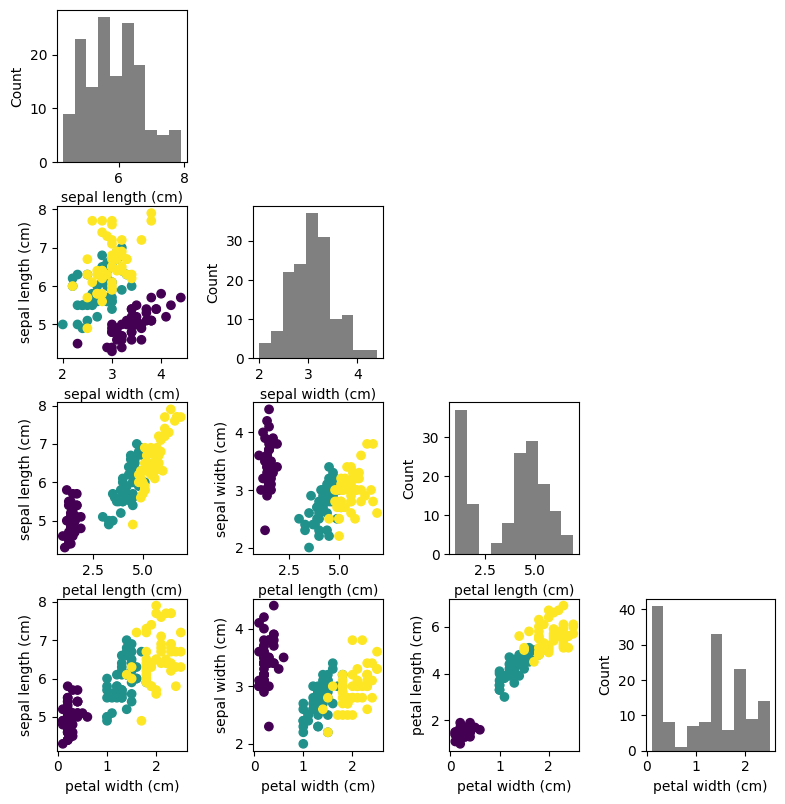

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize= (8,8))
fig.tight_layout()

names = iris.feature_names

for i, j in zip(*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(x[:, j], x[:, i], c=y)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[i, j].set_axis_off()

for i in range (n_features):
  ax[i, i].hist(x[:, i], color = 'grey')
  ax[i, i].set_ylabel('Count')
  ax[i, i].set_xlabel(names[i])

plt.show()

Kode dibawah ini  digunakan untuk melakukan standarisasi data secara manual tanpa menggunakan library seperti scikit-learn. Standarisasi berarti mengubah data sehingga memiliki rata-rata (mean) 0 dan standar deviasi (std) 1.

In [18]:
def mean(x):
    return sum(x)/len(x)

def std(x):
    return (sum((i-mean(x))**2 for i in x)/len(x))**0.5

def standarize_data(x):
    return (x-mean(x))/std(x)

x_std = standarize_data(x)

kode di bawah digunakan untuk menampilkan data asli dan data yang sudah distandarisasi

In [5]:
print(x)
print(x_std)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Kode dibawah ini digunakan untuk menghitung matriks kovarians, dan tujuannya adalah untuk mengetahui hubungan antar fitur (variabel) dalam dataset setelah distandarisasi.

In [6]:
def covariance(x):
    return(x.T @ x) / (x.shape[0]-1)

cov_mat = covariance(x_std)

cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

kode dibawah digunakan untuk menghitung eigenvalue dan eigenvector dari matriks kovarians hasil standarisasi data sebagai bagian dari proses Principal Component Analysis (PCA).

In [7]:
from numpy.linalg import eig

#eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig (cov_mat)

#adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print ('Eigenvalues \n', eig_vals)
print ('Eigenvectors \n',eig_vecs)

Eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


kode di bawah digunakan untuk mengurutkan pasangan eigenvalue dan eigenvector berdasarkan kontribusi variansi terbesar

In [8]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(np.float64(2.9380850501999918), array([ 0.52106591,  0.37741762,  0.71956635, -0.26128628])), (np.float64(0.920164904162487), array([-0.26934744,  0.92329566, -0.24438178,  0.12350962])), (np.float64(0.14774182104494785), array([ 0.5804131 ,  0.02449161, -0.14212637,  0.80144925])), (np.float64(0.020853862176462023), array([ 0.56485654,  0.06694199, -0.63427274, -0.52359713]))]


kode dibawah digunakan digunakan untuk memilih sejumlah komponen utama (principal components)

In [9]:
k = 2
w = eig_vecs_sorted[:k, :]

print(w.shape)

(2, 4)


Kode dibawah digunakan untuk menghitung dan menampilkan persentase variasi data yang dijelaskan oleh setiap komponen utama (principal component) dalam PCA, serta akumulasi total variasi dari komponen pertama hingga terakhir.

Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


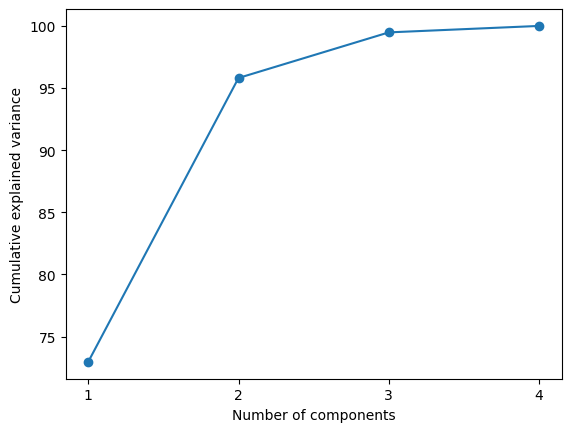

In [10]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Kode dibawah digunakan untuk memproyeksikan data asli yang telah distandarisasi (x_std) ke dimensi yang lebih rendah menggunakan matriks proyeksi w.

In [11]:
x_proj = x_std.dot(w.T)
print(x_proj.shape)
print(x.shape)

(150, 2)
(150, 4)


kode dibawah digunakan untuk menampilkan hasil proyeksi data ke dalam 2 dimensi (hasil PCA) menggunakan scatter plot.

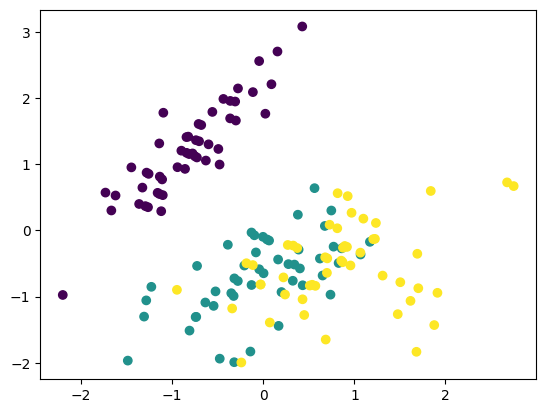

In [12]:
plt.scatter(x_proj[:,0],x_proj[:,1],c=y)


Kode ini menggunakan Scikit-learn untuk melakukan Principal Component Analysis (PCA) pada data Iris yang sudah distandardisasi, dengan memproyeksikan data ke dalam k komponen utama, kemudian menampilkan scatter plot dari dua komponen utama.

(150, 2)


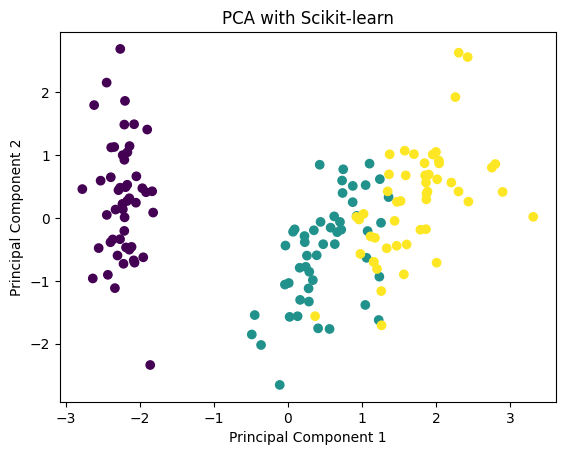

Manual PCA projection (first 5 rows):
[[-0.70539843  1.34849538]
 [-1.2660729   0.35106952]
 [-1.25948347  0.85531141]
 [-1.32770363  0.64762793]
 [-0.68165456  1.59367132]]

Scikit-learn PCA projection (first 5 rows):
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]

Correlation between manual and scikit-learn PC1: 0.8093603929074399
Correlation between manual and scikit-learn PC2: 0.6654899289230493


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=k)
x_proj_sklearn = pca.fit_transform(x_std)
print(x_proj_sklearn.shape)
plt.scatter(x_proj_sklearn[:, 0], x_proj_sklearn[:, 1], c=y)
plt.title('PCA with Scikit-learn')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print("Manual PCA projection (first 5 rows):")
print(x_proj[:5])
print("\nScikit-learn PCA projection (first 5 rows):")
print(x_proj_sklearn[:5])
print("\nCorrelation between manual and scikit-learn PC1:", np.corrcoef(x_proj[:, 0], x_proj_sklearn[:, 0])[0, 1])
print("Correlation between manual and scikit-learn PC2:", np.corrcoef(x_proj[:, 1], x_proj_sklearn[:, 1])[0, 1])
